In [1]:
# opening the simfin data
import pandas as pd

# Define the file path
file_path = "data/us-shareprices-daily.csv"

# Read the CSV file with semicolon separator
df = pd.read_csv(file_path, sep=';')

# Display the first few rows
print(df.head())


  Ticker  SimFinId        Date   Open   High    Low  Close  Adj. Close  \
0      A     45846  2019-04-01  80.96  81.77  80.96  81.56       78.33   
1      A     45846  2019-04-02  81.71  81.76  81.03  81.14       77.93   
2      A     45846  2019-04-03  81.54  82.02  81.46  81.94       78.70   
3      A     45846  2019-04-04  81.84  82.05  80.44  80.83       77.63   
4      A     45846  2019-04-05  81.19  81.92  81.05  81.47       78.25   

    Volume  Dividend  Shares Outstanding  
0  1522681      0.16         317515869.0  
1  1203037       NaN         317515869.0  
2  2141025       NaN         317515869.0  
3  2180112       NaN         317515869.0  
4  1502875       NaN         317515869.0  


In [ ]:
# opening company data
# Define the file path
file_path2 = "data/us-companies.csv"

# Read the CSV file with semicolon separator
df2 = pd.read_csv(file_path2, sep=';')

# Display the first few rows
print(df.head())

  Ticker  SimFinId        Date   Open   High    Low  Close  Adj. Close  \
0      A     45846  2019-04-01  80.96  81.77  80.96  81.56       78.33   
1      A     45846  2019-04-02  81.71  81.76  81.03  81.14       77.93   
2      A     45846  2019-04-03  81.54  82.02  81.46  81.94       78.70   
3      A     45846  2019-04-04  81.84  82.05  80.44  80.83       77.63   
4      A     45846  2019-04-05  81.19  81.92  81.05  81.47       78.25   

    Volume  Dividend  Shares Outstanding  
0  1522681      0.16         317515869.0  
1  1203037       NaN         317515869.0  
2  2141025       NaN         317515869.0  
3  2180112       NaN         317515869.0  
4  1502875       NaN         317515869.0  


In [3]:
# Merge dfs
merged_df = pd.merge(df2, df, on="SimFinId", how="inner") 
# Display the first few rows
print(merged_df.head())

  Ticker_x  SimFinId              Company Name  IndustryId          ISIN  \
0        A     45846  AGILENT TECHNOLOGIES INC    106001.0  US00846U1016   
1        A     45846  AGILENT TECHNOLOGIES INC    106001.0  US00846U1016   
2        A     45846  AGILENT TECHNOLOGIES INC    106001.0  US00846U1016   
3        A     45846  AGILENT TECHNOLOGIES INC    106001.0  US00846U1016   
4        A     45846  AGILENT TECHNOLOGIES INC    106001.0  US00846U1016   

   End of financial year (month)  Number Employees  \
0                           10.0           16400.0   
1                           10.0           16400.0   
2                           10.0           16400.0   
3                           10.0           16400.0   
4                           10.0           16400.0   

                                    Business Summary Market        CIK  ...  \
0  Agilent Technologies Inc is engaged in life sc...     us  1090872.0  ...   
1  Agilent Technologies Inc is engaged in life sc...     us 

In [4]:
merged_df["Date"] = pd.to_datetime(merged_df["Date"], format='%Y-%m-%d')

# Transform Company Name into a string
merged_df["Company Name"] = merged_df["Company Name"].astype(str)

In [5]:
# Define the list of columns to keep
columns_to_keep = ["Ticker_x",
    "Company Name", "IndustryId", "Number Employees", "Date", "Open", 
    "High", "Low", "Close", "Adj. Close", "Volume", "Dividend", "Shares Outstanding"
]

# Select only the specified columns
merged_df = merged_df[columns_to_keep]

# Display the first few rows of the updated DataFrame
print(merged_df.head())

  Ticker_x              Company Name  IndustryId  Number Employees       Date  \
0        A  AGILENT TECHNOLOGIES INC    106001.0           16400.0 2019-04-01   
1        A  AGILENT TECHNOLOGIES INC    106001.0           16400.0 2019-04-02   
2        A  AGILENT TECHNOLOGIES INC    106001.0           16400.0 2019-04-03   
3        A  AGILENT TECHNOLOGIES INC    106001.0           16400.0 2019-04-04   
4        A  AGILENT TECHNOLOGIES INC    106001.0           16400.0 2019-04-05   

    Open   High    Low  Close  Adj. Close   Volume  Dividend  \
0  80.96  81.77  80.96  81.56       78.33  1522681      0.16   
1  81.71  81.76  81.03  81.14       77.93  1203037       NaN   
2  81.54  82.02  81.46  81.94       78.70  2141025       NaN   
3  81.84  82.05  80.44  80.83       77.63  2180112       NaN   
4  81.19  81.92  81.05  81.47       78.25  1502875       NaN   

   Shares Outstanding  
0         317515869.0  
1         317515869.0  
2         317515869.0  
3         317515869.0  
4       

In [6]:
# Change all Dividend missing in merged to 0 and then try to fix others
merged_df["Dividend"] = merged_df["Dividend"].fillna(0)

# Calculate the percentage of missing values per column
missing_percentage = (merged_df.isnull().sum() / len(merged_df)) * 100

# Display the missing values percentage for each column
print(missing_percentage)

Ticker_x              0.000000
Company Name          0.000000
IndustryId            0.914327
Number Employees      5.198672
Date                  0.000000
Open                  0.000000
High                  0.000000
Low                   0.000000
Close                 0.000000
Adj. Close            0.000000
Volume                0.000000
Dividend              0.000000
Shares Outstanding    8.965373
dtype: float64


In [7]:
# Fill missing IndustryId with -1 (as a placeholder)
merged_df["IndustryId"].fillna(-1, inplace=True)

# Fill Number Employees with the mean per IndustryId
merged_df["Number Employees"] = merged_df.groupby("IndustryId")["Number Employees"].transform(lambda x: x.fillna(x.mean()))

# Fill Shares Outstanding with the mean per IndustryId
merged_df["Shares Outstanding"] = merged_df.groupby("IndustryId")["Shares Outstanding"].transform(lambda x: x.fillna(x.mean()))

# Check if any missing values remain
print(merged_df.isnull().sum())

/var/folders/91/rjyzry6x6nxbh21yy7l8hc800000gn/T/ipykernel_5546/4000884963.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df["IndustryId"].fillna(-1, inplace=True)


Ticker_x              0
Company Name          0
IndustryId            0
Number Employees      0
Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj. Close            0
Volume                0
Dividend              0
Shares Outstanding    0
dtype: int64


In [8]:
magnificent_7_tickers = ["AAPL", "MSFT", "GOOGL", "GOOG", "AMZN", "NVDA", "TSLA", "META"]
# Filter dataset to only include the Magnificent 7 tickers
filtered_df = merged_df[merged_df["Ticker_x"].isin(magnificent_7_tickers)]

# Display the unique tickers in the filtered dataset (as a final check)
print("Filtered Unique Tickers:", filtered_df["Ticker_x"].unique())

# Display first few rows to confirm filtering
print(filtered_df.head())

Filtered Unique Tickers: ['AAPL' 'AMZN' 'GOOG' 'META' 'MSFT' 'NVDA' 'TSLA']
      Ticker_x Company Name  IndustryId  Number Employees       Date   Open  \
14264     AAPL    APPLE INC    101001.0          147000.0 2019-04-01  47.91   
14265     AAPL    APPLE INC    101001.0          147000.0 2019-04-02  47.77   
14266     AAPL    APPLE INC    101001.0          147000.0 2019-04-03  48.31   
14267     AAPL    APPLE INC    101001.0          147000.0 2019-04-04  48.70   
14268     AAPL    APPLE INC    101001.0          147000.0 2019-04-05  49.11   

        High    Low  Close  Adj. Close     Volume  Dividend  \
14264  47.92  47.09  47.81       45.81  111447856       0.0   
14265  48.62  47.76  48.51       46.47   91062928       0.0   
14266  49.12  48.29  48.84       46.79   93087320       0.0   
14267  49.09  48.28  48.92       46.87   76457100       0.0   
14268  49.27  48.98  49.25       47.19   74106576       0.0   

       Shares Outstanding  
14264        1.842914e+10  
14265        1

In [ ]:
# Define output file path (change the path as needed)
output_path = "data/magnificent_7_filtered.csv"  # Adjust this path to your preferred location

# Save the filtered dataset to a CSV file
filtered_df.to_csv(output_path, index=False)

# Confirm save location
print(f"Filtered dataset saved to: {output_path}")

Filtered dataset saved to: /Users/samginzburg/Documents/magnificent_7_filtered.csv


In [10]:
# Create a dictionary of DataFrames, one for each company
company_dfs = {ticker: filtered_df[filtered_df["Ticker_x"] == ticker] for ticker in filtered_df["Ticker_x"].unique()}

# Display the tickers to verify
print("Companies in dataset:", company_dfs.keys())


Companies in dataset: dict_keys(['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA'])


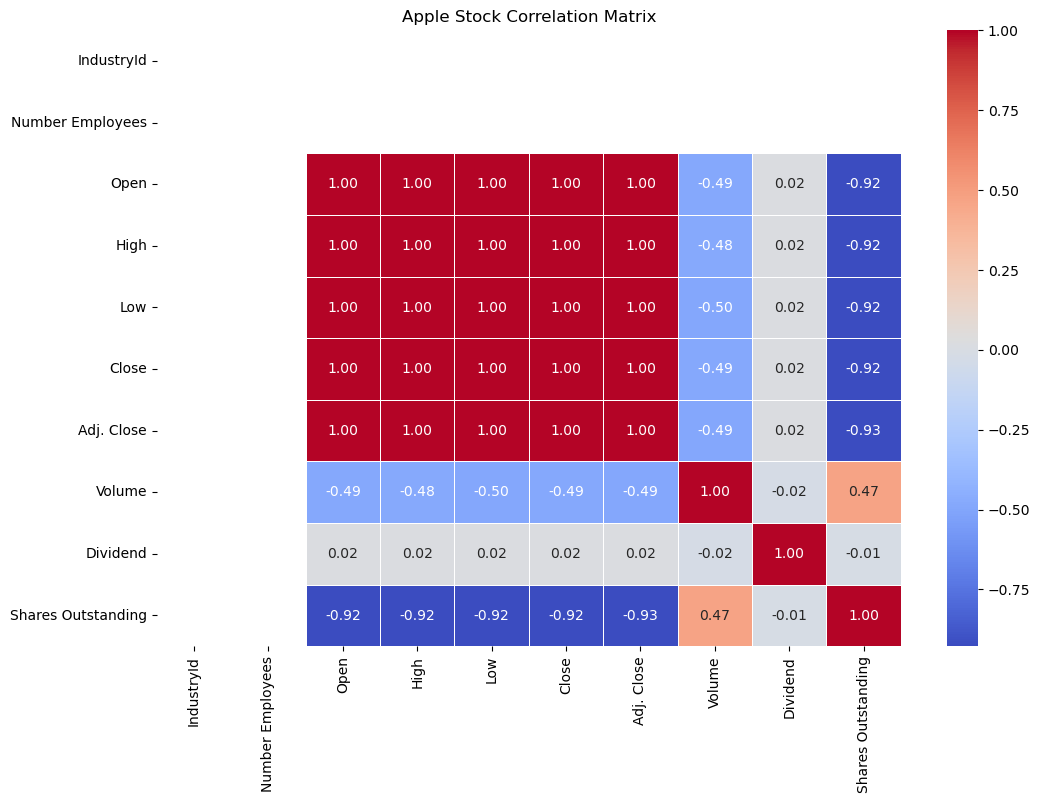

Close                 1.000000
Adj. Close            0.999916
Low                   0.999546
High                  0.999525
Open                  0.999002
Dividend              0.016038
Volume               -0.488490
Shares Outstanding   -0.924528
IndustryId                 NaN
Number Employees           NaN
Name: Close, dtype: float64


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select Apple's DataFrame
apple_df = company_dfs["AAPL"]

# Drop non-numeric columns before correlation analysis
numeric_apple_df = apple_df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_apple_df.corr()

# Display correlation matrix visually
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Apple Stock Correlation Matrix")
plt.show()

# Print correlation values sorted by Close
correlation_with_close = correlation_matrix["Close"].sort_values(ascending=False)
print(correlation_with_close)


In [12]:
# Define the columns to drop
columns_to_drop = [
    "IndustryId", 
    "Number Employees", 
    "Open", 
    "High", 
    "Low", 
    "Adj. Close", 
    "Dividend"
]

# Drop the columns from the general filtered_df
filtered_df = filtered_df.drop(columns=columns_to_drop)

# Display the updated dataset to verify
print(filtered_df.head())
print("Remaining columns:", filtered_df.columns)

      Ticker_x Company Name       Date  Close     Volume  Shares Outstanding
14264     AAPL    APPLE INC 2019-04-01  47.81  111447856        1.842914e+10
14265     AAPL    APPLE INC 2019-04-02  48.51   91062928        1.842914e+10
14266     AAPL    APPLE INC 2019-04-03  48.84   93087320        1.842914e+10
14267     AAPL    APPLE INC 2019-04-04  48.92   76457100        1.842914e+10
14268     AAPL    APPLE INC 2019-04-05  49.25   74106576        1.842914e+10
Remaining columns: Index(['Ticker_x', 'Company Name', 'Date', 'Close', 'Volume',
       'Shares Outstanding'],
      dtype='object')


In [13]:
# Create a dictionary of DataFrames, one for each company
company_dfs = {ticker: filtered_df[filtered_df["Ticker_x"] == ticker] for ticker in filtered_df["Ticker_x"].unique()}

# Display the tickers to verify
print("Companies in dataset:", company_dfs.keys())

Companies in dataset: dict_keys(['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA'])


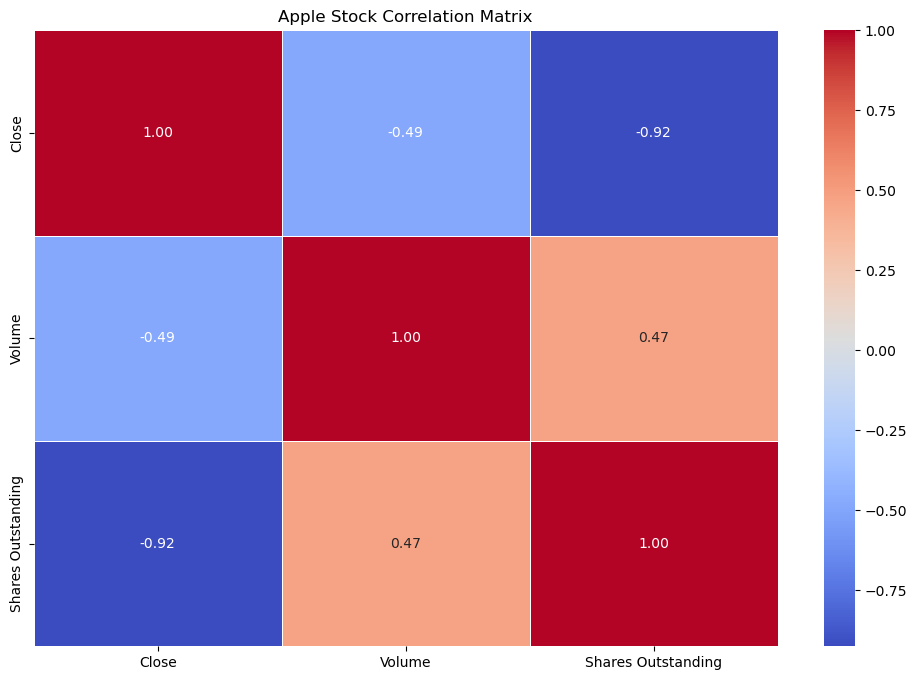

Close                 1.000000
Volume               -0.488490
Shares Outstanding   -0.924528
Name: Close, dtype: float64


In [14]:
# Select Apple's DataFrame
apple_df = company_dfs["AAPL"]

# Drop non-numeric columns before correlation analysis
numeric_apple_df = apple_df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_apple_df.corr()

# Display correlation matrix visually
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Apple Stock Correlation Matrix")
plt.show()

# Print correlation values sorted by Close
correlation_with_close = correlation_matrix["Close"].sort_values(ascending=False)
print(correlation_with_close)

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the target variable (binary classification: 1 = Price Up, 0 = Price Down)
apple_df = apple_df.sort_values(by="Date")  # Ensure correct time order
apple_df["Price_Up"] = (apple_df["Close"].shift(-1) > apple_df["Close"]).astype(int)

# Drop last row (no next-day price available)
apple_df = apple_df.dropna()

# Select features (Close price, Volume, Shares Outstanding)
features = ["Close", "Volume", "Shares Outstanding"]
X = apple_df[features]
y = apple_df["Price_Up"]

# Split into training (80%) and testing (20%) - Keep chronological order
train_size = int(len(apple_df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Standardize the features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
# Define the Logistic Regression model
log_reg = LogisticRegression()

# Set up 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=kf, scoring="accuracy")

# Train the model on the full training set
log_reg.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate Model Performance
print(f"Cross-validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Cross-validation Accuracy Scores: [0.52763819 0.55276382 0.53535354 0.5        0.54040404]
Mean CV Accuracy: 0.5312
Test Set Accuracy: 0.5040

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.33      0.39       122
           1       0.51      0.67      0.58       126

    accuracy                           0.50       248
   macro avg       0.50      0.50      0.49       248
weighted avg       0.50      0.50      0.49       248



# Try doing gradient descent to increase accuracy. 

# The results aren't very good, so we move on to a different kind of model. 
# Time Series!

In [17]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test on Close prices
adf_result = adfuller(apple_df["Close"])

# Print ADF results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] > 0.05:
    print("Data is non-stationary. Differencing is required.")
else:
    print("Data is stationary.")


ADF Statistic: -1.5586485491992719
p-value: 0.5043253490822289
Data is non-stationary. Differencing is required.


In [18]:
# Apply first difference if necessary
apple_df["Close_diff"] = apple_df["Close"].diff()

# Drop NaN values (since differencing creates NaNs in the first row)
apple_df = apple_df.dropna()

# Re-run ADF test on differenced data
adf_result_diff = adfuller(apple_df["Close_diff"])

# Print results
print("ADF Statistic (Differenced):", adf_result_diff[0])
print("p-value:", adf_result_diff[1])
if adf_result_diff[1] > 0.05:
    print("Differenced data is still non-stationary. Further differencing may be required.")
else:
    print("Differenced data is now stationary.")


ADF Statistic (Differenced): -36.26813432460656
p-value: 0.0
Differenced data is now stationary.


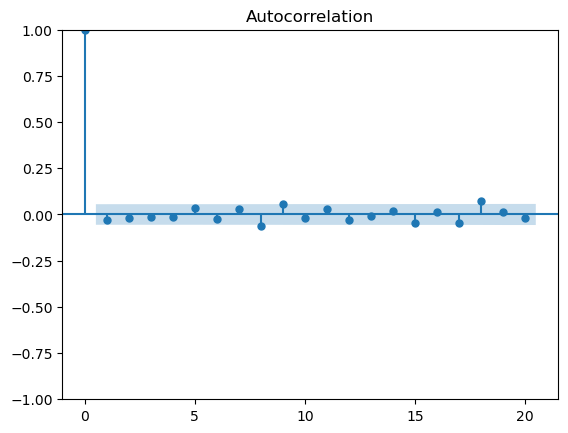

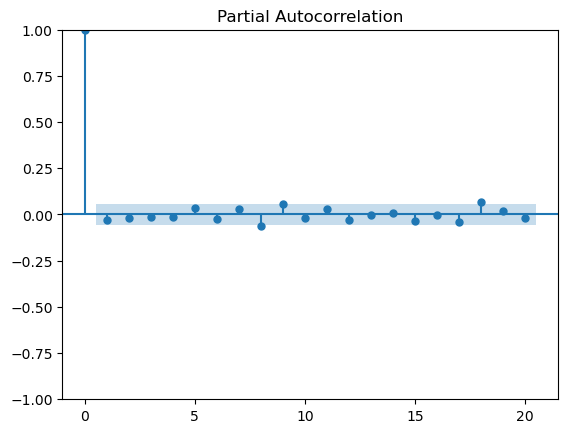

In [19]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF (Autocorrelation Function) - Checks how past values influence future values
plot_acf(apple_df["Close_diff"], lags=20)
plt.show()

# PACF (Partial Autocorrelation Function) - Identifies the direct impact of past values
plot_pacf(apple_df["Close_diff"], lags=20)
plt.show()


# Here we get to the point where we have stationary data, congratulations. 
# But it also shows that the previous day's price has little correlation with the next day's price. So we must add additional variables. 

Correlation with Price_Up:
 Price_Up      1.000000
Close_diff    0.722826
SMA_5         0.305963
RSI           0.270035
SMA_10        0.232193
MACD          0.025510
Volatility   -0.038838
Name: Price_Up, dtype: float64


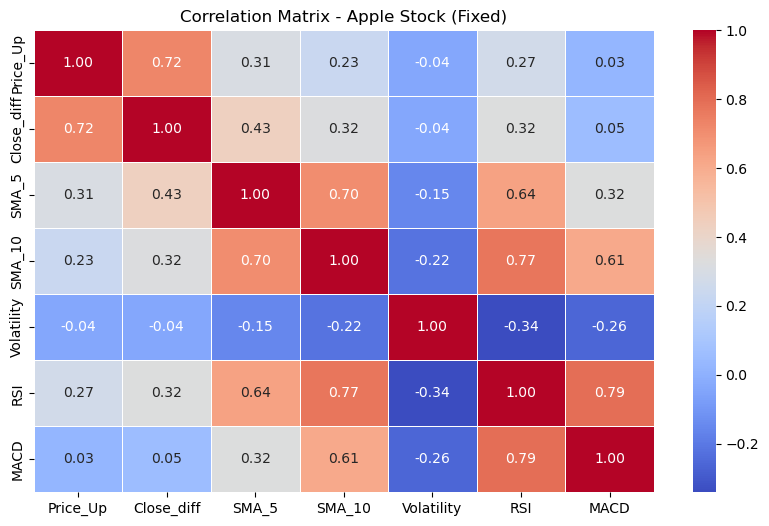

In [20]:
import talib
# Define target variable: Will the differenced price be positive?
apple_df["Price_Up"] = (apple_df["Close_diff"] > 0).astype(int)

# Compute technical indicators
apple_df["SMA_5"] = apple_df["Close_diff"].rolling(window=5).mean()
apple_df["SMA_10"] = apple_df["Close_diff"].rolling(window=10).mean()
apple_df["Volatility"] = apple_df["Close_diff"].rolling(window=5).std()
apple_df["RSI"] = talib.RSI(apple_df["Close"], timeperiod=14)
apple_df["MACD"], _, _ = talib.MACD(apple_df["Close"])

# Drop NaN values caused by rolling calculations
apple_df = apple_df.dropna()

# Compute correlation matrix
correlation_matrix = apple_df[["Price_Up", "Close_diff", "SMA_5", "SMA_10", "Volatility", "RSI", "MACD"]].corr()

# Display correlation values sorted by Price_Up
correlation_with_target = correlation_matrix["Price_Up"].sort_values(ascending=False)
print("Correlation with Price_Up:\n", correlation_with_target)

# Visualize correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - Apple Stock (Fixed)")
plt.show()

In [21]:
# Drop weakly correlated features
features_to_drop = [ "Volatility", "MACD"]
apple_df = apple_df.drop(columns=features_to_drop)

# Verify remaining features
print("Remaining features:", apple_df.columns)

Remaining features: Index(['Ticker_x', 'Company Name', 'Date', 'Close', 'Volume',
       'Shares Outstanding', 'Price_Up', 'Close_diff', 'SMA_5', 'SMA_10',
       'RSI'],
      dtype='object')


In [22]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable
features = ["SMA_5", "SMA_10", "RSI"]
X = apple_df[features]
y = apple_df["Price_Up"]

# Split into training (80%) and testing (20%) - Keep chronological order
train_size = int(len(apple_df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Logistic Regression model
log_reg = LogisticRegression()

# Set up 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=kf, scoring="accuracy")

# Train the model on full training set
log_reg.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate Model Performance
print(f"Cross-validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Cross-validation Accuracy Scores: [0.61139896 0.66839378 0.62694301 0.61139896 0.58854167]
Mean CV Accuracy: 0.6213
Test Set Accuracy: 0.6570

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.54      0.61       120
           1       0.63      0.77      0.69       122

    accuracy                           0.66       242
   macro avg       0.66      0.66      0.65       242
weighted avg       0.66      0.66      0.65       242



In [26]:
# Ensure DataFrame has a proper integer index
apple_df = apple_df.reset_index(drop=True)

# Initialize Signal column as Hold
apple_df["Signal"] = "Hold"  

holding = False  # Tracks whether we currently own the stock

# Iterate through each row except the last
for i in range(len(apple_df) - 1):  
    if pd.notna(apple_df.loc[i, "Close"]):  # Use .loc[] instead of .at[]
        if apple_df.loc[i, "Price_Up"] == 1:  # Price predicted to go up
            if not holding:  
                apple_df.loc[i, "Signal"] = "Buy"
                holding = True  # We now own the stock
            else:
                apple_df.loc[i, "Signal"] = "Hold"
        else:  # Price predicted to go down
            if holding:
                apple_df.loc[i, "Signal"] = "Sell"
                holding = False  # We no longer own the stock
            else:
                apple_df.loc[i, "Signal"] = "Hold"

# Display sample of updated Signal column
print(apple_df[["Date", "Close", "Price_Up", "Signal"]].tail(20))


     Date  Close  Price_Up Signal
2391  NaT    NaN       NaN   Hold
2392  NaT    NaN       NaN   Hold
2393  NaT    NaN       NaN   Hold
2394  NaT    NaN       NaN   Hold
2395  NaT    NaN       NaN   Hold
2396  NaT    NaN       NaN   Hold
2397  NaT    NaN       NaN   Hold
2398  NaT    NaN       NaN   Hold
2399  NaT    NaN       NaN   Hold
2400  NaT    NaN       NaN   Hold
2401  NaT    NaN       NaN   Hold
2402  NaT    NaN       NaN   Hold
2403  NaT    NaN       NaN   Hold
2404  NaT    NaN       NaN   Hold
2405  NaT    NaN       NaN   Hold
2406  NaT    NaN       NaN   Hold
2407  NaT    NaN       NaN   Hold
2408  NaT    NaN       NaN   Hold
2409  NaT    NaN       NaN   Hold
2410  NaT    NaN       NaN   Hold


In [ ]:
# Define the file path (update the path as needed)
output_path = "data/apple_stock_predictions.csv"

# Save the DataFrame as a CSV file
apple_df.to_csv(output_path, index=False)

# Confirm save location
print(f"Apple stock predictions saved to: {output_path}")


Apple stock predictions saved to: /Users/samginzburg/Documents/apple_stock_predictions.csv
